In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler, Imputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold, StratifiedKFold, cross_val_score
from sklearn.metrics import auc, roc_auc_score, roc_curve, precision_recall_curve, classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from scipy import interp
from sklearn.preprocessing import label_binarize

import seaborn as sns

from collections import Counter
import MySQLdb

%matplotlib inline

/Users/adamsoto/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# Read banking data into dataframe
df = pd.read_csv('bank-additional/bank-additional-full.csv', sep=';') # read in the csv file

In [3]:
# Print a couple of rows of data
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# Attribute Information:

## Input variables:

### bank client data:

### related with the last contact of the current campaign:

### other attributes:

### social and economic context attributes

## Output variable (desired target):

# Data Cleasing

In [4]:
list(df)

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y']

In [5]:
# Check to see if there are any missing values
df[df.isnull().any(axis=1)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y


In [6]:
# Dropping duration column based on attribute description
df.drop('duration', axis=1)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [7]:
# Method to map month abbrev. to numeric
def monthToNum(shortMonth):
    return{
            'jan' : 1,
            'feb' : 2,
            'mar' : 3,
            'apr' : 4,
            'may' : 5,
            'jun' : 6,
            'jul' : 7,
            'aug' : 8,
            'sep' : 9, 
            'oct' : 10,
            'nov' : 11,
            'dec' : 12
        }[shortMonth]

In [8]:
# Creating column to represent the numeric month value
month_num = []

for row in df['month']:
    month_num.append(monthToNum(row))
    
df['month_cat'] = month_num

In [9]:
# Method to map day abbrev. to numeric
def dayToNum(shortDay):
    return{
            'sun' : 1,
            'mon' : 2,
            'tue' : 3,
            'wed' : 4,
            'thu' : 5,
            'fri' : 6,
            'sat' : 7,
        }[shortDay]

In [10]:
# Creating column to represent the numeric day value
day_num = []

for row in df['day_of_week']:
    day_num.append(dayToNum(row))
    
df['day_cat'] = day_num

## Looking into Missing Values in the Data

In [11]:
job_class = pd.crosstab(index=df["job"], columns=df["y"], margins=True)
print job_class

y                 no   yes    All
job                              
admin.          9070  1352  10422
blue-collar     8616   638   9254
entrepreneur    1332   124   1456
housemaid        954   106   1060
management      2596   328   2924
retired         1286   434   1720
self-employed   1272   149   1421
services        3646   323   3969
student          600   275    875
technician      6013   730   6743
unemployed       870   144   1014
unknown          293    37    330
All            36548  4640  41188


In [12]:
marital_class = pd.crosstab(index=df["marital"], columns=df["y"], margins=True)
print marital_class

y            no   yes    All
marital                     
divorced   4136   476   4612
married   22396  2532  24928
single     9948  1620  11568
unknown      68    12     80
All       36548  4640  41188


In [13]:
education_class = pd.crosstab(index=df["education"], columns=df["y"], margins=True)
print education_class

y                       no   yes    All
education                              
basic.4y              3748   428   4176
basic.6y              2104   188   2292
basic.9y              5572   473   6045
high.school           8484  1031   9515
illiterate              14     4     18
professional.course   4648   595   5243
university.degree    10498  1670  12168
unknown               1480   251   1731
All                  36548  4640  41188


In [14]:
default_class = pd.crosstab(index=df["default"], columns=df["y"], margins=True)
print default_class

y           no   yes    All
default                    
no       28391  4197  32588
unknown   8154   443   8597
yes          3     0      3
All      36548  4640  41188


In [15]:
housing_class = pd.crosstab(index=df["housing"], columns=df["y"], margins=True)
print housing_class

y           no   yes    All
housing                    
no       16596  2026  18622
unknown    883   107    990
yes      19069  2507  21576
All      36548  4640  41188


In [16]:
loan_class = pd.crosstab(index=df["loan"], columns=df["y"], margins=True)
print loan_class

y           no   yes    All
loan                       
no       30100  3850  33950
unknown    883   107    990
yes       5565   683   6248
All      36548  4640  41188


In [17]:
# Encoding Categorical values
lb_make = LabelEncoder()

df["job_cat"] = lb_make.fit_transform(df["job"])
df["marital_cat"] = lb_make.fit_transform(df["marital"])
df["education_cat"] = lb_make.fit_transform(df["education"])
df["default_cat"] = lb_make.fit_transform(df["default"])
df["housing_cat"] = lb_make.fit_transform(df["housing"])
df["contact_cat"] = lb_make.fit_transform(df["contact"])
df["poutcome_cat"] = lb_make.fit_transform(df["poutcome"])
df["y_cat"] = lb_make.fit_transform(df["y"])

In [18]:
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,month_cat,day_cat,job_cat,marital_cat,education_cat,default_cat,housing_cat,contact_cat,poutcome_cat,y_cat
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,5,2,3,1,0,0,0,1,1,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,5,2,7,1,3,1,0,1,1,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,5,2,7,1,3,0,2,1,1,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,5,2,0,1,1,0,0,1,1,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,5,2,7,1,3,0,0,1,1,0
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,5,2,7,1,2,1,0,1,1,0
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,5,2,0,1,5,0,0,1,1,0
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,5,2,1,1,7,1,0,1,1,0
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,5,2,9,2,5,0,2,1,1,0
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,5,2,7,2,3,0,2,1,1,0


### Data Imputation and Removal

In [19]:
unknown_Marital = df.loc[df['marital'] == 'unknown', 'marital_cat'].iloc[1]
df = df.drop(df[df.marital_cat == unknown_Marital].index)

In [20]:
unknown_Job = df.loc[df['job'] == 'unknown', 'job_cat'].iloc[1]
df = df.drop(df[df.job_cat == unknown_Job].index)

In [21]:
unknown_Education = df.loc[df['education'] == 'unknown', 'education_cat'].iloc[1]
df.loc[df['education_cat'] == unknown_Education, 'education_cat'] = np.nan
df["education_cat"].fillna(df.groupby("y")["education_cat"].transform("mean"), inplace=True)
df.education_cat.unique()

array([ 0.        ,  3.        ,  1.        ,  2.        ,  5.        ,
        3.5692343 ,  6.        ,  3.92683486,  4.        ])

In [22]:
unknown_Housing = df.loc[df['housing'] == 'unknown', 'housing_cat'].iloc[1]
df.loc[df['education_cat'] == unknown_Housing, 'housing_cat'] = np.nan
df["housing_cat"].fillna(df.groupby("y")["housing_cat"].transform("mean"), inplace=True)
df.housing_cat.unique()

array([ 0.        ,  2.        ,  1.06958612,  1.        ,  1.10596778])

# Attempt 1: Binary Linear Regression

In [23]:
columns_for_reg = ['age', 'campaign', 'pdays', 'previous', 'job_cat', 'marital_cat', 'education_cat', 'default_cat', 
                   'housing_cat','contact_cat', 'poutcome_cat', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 
                   'euribor3m', 'nr.employed']
df[columns_for_reg].head(20)

,age,campaign,pdays,previous,job_cat,marital_cat,education_cat,default_cat,housing_cat,contact_cat,poutcome_cat,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,1,999,0,3,1,0.000000,0,0.000000,1,1,1.1,93.994,-36.4,4.857,5191.0
1,57,1,999,0,7,1,3.000000,1,0.000000,1,1,1.1,93.994,-36.4,4.857,5191.0
2,37,1,999,0,7,1,3.000000,0,2.000000,1,1,1.1,93.994,-36.4,4.857,5191.0
3,40,1,999,0,0,1,1.000000,0,1.069586,1,1,1.1,93.994,-36.4,4.857,5191.0
4,56,1,999,0,7,1,3.000000,0,0.000000,1,1,1.1,93.994,-36.4,4.857,5191.0
5,45,1,999,0,7,1,2.000000,1,0.000000,1,1,1.1,93.994,-36.4,4.857,5191.0
6,59,1,999,0,0,1,5.000000,0,0.000000,1,1,1.1,93.994,-36.4,4.857,5191.0
7,41,1,999,0,1,1,3.569234,1,0.000000,1,1,1.1,93.994,-36.4,4.857,5191.0
8,24,1,999,0,9,2,5.000000,0,2.000000,1,1,1.1,93.994,-36.4,4.857,5191.0
9,25,1,999,0,7,2,3.000000,0,2.000000,1,1,1.1,93.994,-36.4,4.857,5191.0


In [24]:
data_to_split = df[columns_for_reg]
outcome_to_split = df['y_cat']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(data_to_split, outcome_to_split, test_size=0.2)
print X_train.shape, y_train.shape
print X_test.shape, y_test.shape

(32629, 16) (32629,)
(8158, 16) (8158,)


In [26]:
model = LogisticRegression(class_weight={0:.1, 1:.9})
model = model.fit(X_train, y_train)

model.score(X_train, y_train)

0.76174568635263107

In [27]:
# what percentage of client subscribed a term deposit from the training set?
# yes = 1 / no = 0
y_train.mean()

0.1135492966379601

If we predicted always predicted the client DIDN'T SUBCRIBE, we would have 89% accuracy.

In [28]:
# examine the coefficients
pd.DataFrame(zip(X_train.columns, np.transpose(model.coef_)))

,0,1
0,age,[0.00388135714399]
1,campaign,[-0.0316750964724]
2,pdays,[-0.00123500151481]
3,previous,[-0.163494248777]
4,job_cat,[0.00395476630486]
5,marital_cat,[0.0884447931149]
6,education_cat,[0.0355055977032]
7,default_cat,[-0.283759458578]
8,housing_cat,[-0.013371967671]
9,contact_cat,[-0.758218179693]


In [29]:
# predict results for the test set
predicted = model.predict(X_test)
probs = model.predict_proba(X_test)

In [30]:
# generate evaluation metrics
print accuracy_score(y_test, predicted)
print roc_auc_score(y_test, probs[:, 1])

0.749203236087
0.778922419056


In [31]:
from sklearn.ensemble import ExtraTreesClassifier

feature_model = ExtraTreesClassifier()
feature_model.fit(X_train, y_train)
#print(feature_model.feature_importances_)

coeffs = pd.DataFrame(zip(X_train.columns, np.transpose(feature_model.feature_importances_)))
coeffs.sort([1], ascending=False)

/Users/adamsoto/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,0,1
0,age,0.193674
14,euribor3m,0.168159
1,campaign,0.111131
4,job_cat,0.088312
6,education_cat,0.077446
2,pdays,0.072536
15,nr.employed,0.057967
8,housing_cat,0.053733
5,marital_cat,0.039541
11,emp.var.rate,0.032127


# Attempt 2: Binary Logistic Regression After Feature Selection

In [32]:
columns_for_reg = ['age', 'euribor3m', 'campaign', 'job_cat', 'education_cat', 
                   'pdays','housing_cat']

In [33]:
data_to_split = df[columns_for_reg]
outcome_to_split = df['y_cat']

In [34]:
lr = LogisticRegression(class_weight={0:.1, 1:.9})
fitbalanced = lr.fit(X_train, y_train)
preds = fitbalanced.predict(X_test)

fpr, tpr, thresholds = roc_curve(y_test, preds, pos_label=1)
auc = auc(fpr, tpr)

print ("Accuracy: ", accuracy_score(y_test, preds))
print ("AUC: ", auc)

('Accuracy: ', 0.74908065702378035)
('AUC: ', 0.71603969953611357)


In [35]:
X = data_to_split.as_matrix().astype(np.float)
y = outcome_to_split.as_matrix().astype(np.int)

In [36]:
scl = StandardScaler()
X = scl.fit_transform(X)

In [37]:
def stratified_cv(X, y, clf_class, shuffle=True, n_folds=10, **kwargs):
    stratified_k_fold = StratifiedKFold(y, n_folds=n_folds, shuffle=shuffle)
    y_pred = y.copy()
    for ii, jj in stratified_k_fold:
        X_train, X_test = X[ii], X[jj]
        y_train = y[ii]
        clf = clf_class(class_weight={0:.1, 1:.9})
        clf.fit(X_train,y_train)
        y_pred[jj] = clf.predict(X_test)
    return y_pred

In [38]:
print('Logistic Regression:           {:.2f}'.format(accuracy_score(y, stratified_cv(X, y, LogisticRegression))))

Logistic Regression:           0.72


In [39]:
logistic_reg_conf_matrix = confusion_matrix(y, stratified_cv(X, y, LogisticRegression))
dumb_conf_matrix = confusion_matrix(y, [0 for ii in y.tolist()]); # ignore the warning as they are all 0

conf_matrix = {
                1: {
                    'matrix': logistic_reg_conf_matrix,
                    'title': 'Logistic Regression',
                   },
                2: {
                    'matrix': dumb_conf_matrix,
                    'title': 'Dumb',
                    },
                }

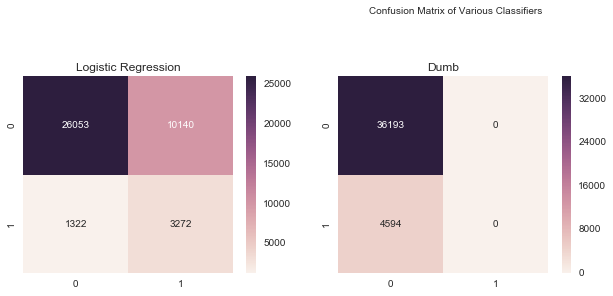

In [40]:
fix, ax = plt.subplots(figsize=(16, 12))
plt.suptitle('Confusion Matrix of Various Classifiers')
for ii, values in conf_matrix.items():
    matrix = values['matrix']
    title = values['title']
    plt.subplot(3, 3, ii) # starts from 1
    plt.title(title);
    sns.heatmap(matrix, annot=True,  fmt='');

In [41]:
print('Logistic Regression:\n {}\n'.format(classification_report(y, stratified_cv(X, y, LogisticRegression))))
print('Dump Classifier:\n {}\n'.format(classification_report(y, [0 for ii in y.tolist()]))); # ignore the warning as they are all 0

Logistic Regression:
              precision    recall  f1-score   support

          0       0.95      0.72      0.82     36193
          1       0.24      0.71      0.36      4594

avg / total       0.87      0.72      0.77     40787


Dump Classifier:
              precision    recall  f1-score   support

          0       0.89      1.00      0.94     36193
          1       0.00      0.00      0.00      4594

avg / total       0.79      0.89      0.83     40787




/Users/adamsoto/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [42]:
from sklearn.metrics import auc

def plot_ROC_curve(classifier, X, y, pos_label=1, n_folds=10):
    mean_tpr = 0.0
    mean_fpr = np.linspace(0, 1, 100)
    all_tpr = []
    for i, (train, test) in enumerate(StratifiedKFold(y, n_folds=n_folds)):
        probas_ = classifier.fit(X[train], y[train]).predict_proba(X[test])
        # Compute ROC curve and area under the curve
        fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1], pos_label=1)
        mean_tpr += interp(mean_fpr, fpr, tpr)
        mean_tpr[0] = 0.0
        roc_auc = auc(fpr, tpr)
        tmp_roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))
    plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Random')
    mean_tpr /= n_folds
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    plt.plot(mean_fpr, mean_tpr, 'k--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

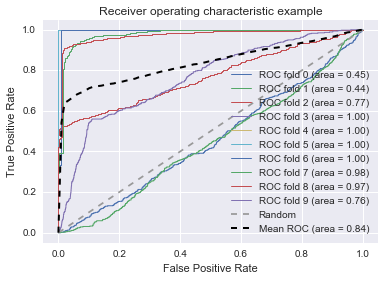

In [43]:
plot_ROC_curve(LogisticRegression(class_weight={0:.1, 1:.9}), X, y)

# Moving data to MySQL DB

In [44]:
# Connect to db and create table

# Open database connection
db = MySQLdb.connect("localhost","root","kingjames21","UCI_Bank")

# prepare a cursor object using cursor() method
cursor = db.cursor()

# Drop table if it already exist using execute() method.
cursor.execute("DROP TABLE IF EXISTS CUSTOMER")

# Create table as per requirement
sql = """CREATE TABLE CUSTOMER (
        AGE int,
        JOB varchar(30),
        MARITAL varchar(30),
        EDUCATION varchar(30),
        `DEFAULT` varchar(30),
        HOUSING varchar(30),
        LOAN varchar(30),
        CONTACT varchar(30),
        MONTH varchar(30),
        DAY varchar(30),
        CAMPAIGN int,
        PDAYS int,
        PREVIOUS int,
        POUTCOME varchar(30),
        EMP_VAR_RATE int,
        CONS_PRICE_IDX int,
        CONS_CONF_IDX int,
        EURIBOR3M decimal(5,3),
        NR_EMPLOYED int,
        TERM_DEPOSIT varchar(30)
        )"""

cursor.execute(sql)

# disconnect from server
db.close()

In [45]:
# Write data to the DB

# Open database connection
db = MySQLdb.connect("localhost","root","kingjames21","UCI_Bank")

# prepare a cursor object using cursor() method
cursor = db.cursor()

for index, row in df.iterrows():
    
    # Prepare SQL query to INSERT a record into the database.
    sql = "INSERT INTO CUSTOMER \
            (AGE, JOB, MARITAL, EDUCATION, `DEFAULT`, \
            HOUSING, LOAN, CONTACT, MONTH, DAY, \
            CAMPAIGN, PDAYS, PREVIOUS, POUTCOME, EMP_VAR_RATE, \
            CONS_PRICE_IDX, CONS_CONF_IDX, EURIBOR3M, NR_EMPLOYED, TERM_DEPOSIT) \
           VALUES ('%d', '%s', '%s', '%s', '%s', \
                   '%s', '%s', '%s', '%s', '%s', \
                   '%d', '%d', '%d', '%s', '%d', \
                   '%d', '%d', '%f', '%d', '%s')" % \
           (row['age'], row['job'], row['marital'], row['education'], row['default'], \
            row['housing'], row['loan'], row['contact'], row['month'], row['day_of_week'], \
            row['campaign'], row['pdays'], row['previous'], row['poutcome'], row['emp.var.rate'], \
            row['cons.price.idx'], row['cons.conf.idx'], row['euribor3m'], row['nr.employed'], row['y'])

    try:
        # Execute the SQL command
        cursor.execute(sql)
    except:
        # Rollback in case there is any error
        db.rollback()
            
try:
    # Commit your changes in the database
    db.commit()
except:
    # Rollback in case there is any error
    db.rollback()

# disconnect from server
db.close()

# Sources:

https://archive.ics.uci.edu/ml/datasets/Bank+Marketing
https://github.com/silicon-valley-data-science/learning-from-imbalanced-classes/blob/master/ImbalancedClasses.ipynb
http://bugra.github.io/work/notes/2014-11-22/an-introduction-to-supervised-learning-scikit-learn/
